In [1]:
%run ChartsCommon.ipynb

In [11]:
def plotDynAndStaticVsBase(our_df, deviationsText, titleText, relations):

    #filtered_df = our_df[our_df['relation'].isin(['stat_vs_base', 'dyn_vs_base'])].copy()
    filtered_df = our_df[our_df['relation'].isin(relations)].copy()# ['internal']
    filtered_df['alg_rel'] = filtered_df['algorithm'] + ' - ' + filtered_df['relation']
    #print("filtered_df\n", filtered_df)

    fig, ax = plt.subplots(figsize=(24, 12))
    ax = sns.barplot(
        data=filtered_df,
        x='size',
        y='ratio',
        hue='alg_rel',
        estimator=gmean,
        palette=palette,
        ci=None
    )
    if "internal" in relations:
        baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')
    #ax.set_yscale("log")
    plt.xticks(rotation=45)
    #plt.ylim(80000, 200000)

    #plt.tight_layout()
    #plt.ylim(25000, 210000)
    plt.yticks(fontsize=32)
    plt.xticks(fontsize=32)
    plt.xlabel('Workflow size', fontsize=32)
    plt.ylabel('Improvement over the baseline, times', fontsize=32)
    plt.legend(fontsize=32, title_fontsize=32)  


    # Get current tick labels and modify them
    xticks = ax.get_xticks()
    xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]

    # Replace label "100" with "<100"
    new_labels = ["<100" if lbl == "100" else lbl for lbl in xticklabels]

    # Apply the modified labels
    ax.set_xticklabels(new_labels, fontsize=32, rotation=45, ha='right')

    handles, labels = ax.get_legend_handles_labels()

    # Apply the mapping
    pretty_labels = [label_map.get(lbl, lbl) for lbl in labels]

    
    # Set updated legend
    ax.legend(handles, pretty_labels, title="Algorithm Variant", fontsize=24, title_fontsize=26)
   # plt.title(f'{titleText} {deviationsText}', fontsize=28) #Makespan improvement over the baseline,


    #inset_ax = inset_axes(ax, width="40%", height="45%", loc='upper left',
    #                      bbox_to_anchor=(0.1, 0.55, 0.4, 0.4), bbox_transform=fig.transFigure)
    inset_ax = inset_axes(ax,
                          width="35%", height="45%", loc='lower left',
                          bbox_to_anchor=(0.135, 0.12, 0.4, 0.4),  # <-- lower position
                          #(0.135, 0.12, 0.4, 0.4)
                          bbox_transform=fig.transFigure)

    # Filter for small sizes (100 and 200)
    small_df = filtered_df[filtered_df['size'].isin([100, 200])]

    sns.barplot(data=small_df, x='size', y='ratio', hue='alg_rel', ax=inset_ax, estimator=gmean,  palette=palette,ci=None)
    inset_ax.set_yscale("log")  # Show small differences better
    inset_ax.set_title("Zoom on small \n sizes (log scale)", fontsize=24, color='red')
    inset_ax.tick_params(axis='both', labelsize=20)
    inset_ax.set_xlabel("")
    inset_ax.set_ylabel("")
    inset_ax.set_xticklabels([])
    inset_ax.tick_params(axis='y', colors='red')

    for spine in inset_ax.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)  # Adjust thickness as needed

    # Optionally draw a rectangle to highlight the zoomed region
    # from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    # mark_inset(ax, inset_ax, loc1=2, loc2=4, fc="none", ec="0.5")

    # Clean up legend (show only one)
    #ax.legend(title="Algorithm Variant", fontsize=16, title_fontsize=16)
    inset_ax.get_legend().remove()

    #plt.tight_layout()

    plt.savefig(f'improv_ov_baseline_newest_{deviationsText}.png', facecolor='white',  bbox_inches='tight')
    plt.show()

    grouped = filtered_df.groupby(['size', 'alg_rel'])['ratio'].agg(safe_gmean).reset_index()
    # Print the values used for bar heights
    print(grouped)

    gr = grouped.groupby(['alg_rel'])['ratio'].agg(safe_gmean)
    print(gr)

./real-exps-correctparams/mergedmanual/*.txt
     size  algorithm     ratio
0     100   MeDiH-BL  0.996803
1     100  MeDiH-BLC  0.993715
2     100   MeDiH-MM  0.985519
3     200   MeDiH-BL  0.915132
4     200  MeDiH-BLC  0.951652
5     200   MeDiH-MM  0.919244
6    1000   MeDiH-BL  0.822286
7    1000  MeDiH-BLC  0.931686
8    1000   MeDiH-MM  0.743048
9    2000   MeDiH-BL  0.900480
10   2000  MeDiH-BLC  0.913892
11   2000   MeDiH-MM  0.789248
12   4000   MeDiH-BL  0.870488
13   4000  MeDiH-BLC  0.912607
14   4000   MeDiH-MM  0.831527
15   8000   MeDiH-BL  0.838064
16   8000  MeDiH-BLC  0.841355
17   8000   MeDiH-MM  0.914965
18  10000   MeDiH-BL  0.836635
19  10000  MeDiH-BLC  0.909971
20  10000   MeDiH-MM  0.960266
21  15000   MeDiH-BL  0.861592
22  15000  MeDiH-BLC  0.858817
23  15000   MeDiH-MM  0.940678
24  18000   MeDiH-BL  0.812572
25  18000  MeDiH-BLC  0.850266
26  18000   MeDiH-MM  0.935659
27  20000   MeDiH-BL  0.851430
28  20000  MeDiH-BLC  0.881737
29  20000   MeDiH-MM  0.9

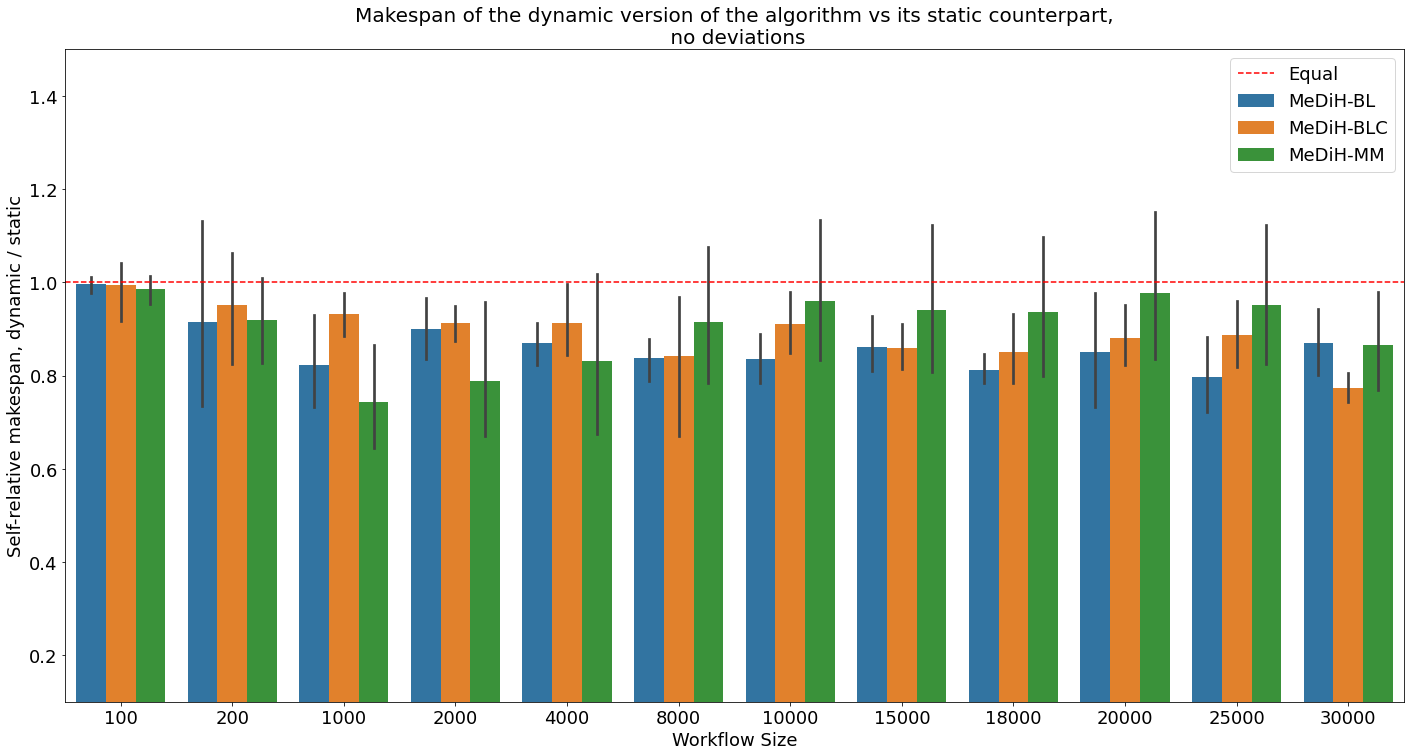

In [9]:

#path = "./param-study-pcsp/merged/*.txt"
#print(path)
#from scipy.stats import gmean

#patterndevs = r'^(BASE|A\d+)-ndev~(pspw\+\d)'

path = "./real-exps-correctparams/mergedmanual/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfsrw=read_dfs(path,patterndevs, 2)
#print(dfsrw)
#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
#dfsVar3 = [dfsrw[('A1','pspw+2')], dfsrw[('A2','pspw+2')], dfsrw[('A3','pspw+2')], dfsrw[('BASE','pspw+2')]]
dfsVar3 = [dfsrw[('A1','10dev')], dfsrw[('A2','10dev')], dfsrw[('A3','10dev')], dfsrw[('BASE','10dev')]]
merged_df_var3 = merge_correct_columns(dfsVar3, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var3)
#print(plot_df.head())

plt.figure(figsize=(24, 12))

internal_df = plot_df[plot_df['relation'] == 'internal']

sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm', estimator=gmean)  #, est=gmean
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')


def safe_gmean(x):
    x = np.array(x)
    x = x[x > 0]  # only positive values
    return gmean(x) if len(x) > 0 else np.nan

grouped = internal_df.groupby(['size', 'algorithm'])['ratio'].agg(safe_gmean).reset_index()
# Print the values used for bar heights
print(grouped)

for name, group in internal_df.groupby(['size', 'algorithm']):
    if (group['ratio'] <= 0).any():
        print(f"Group {name} contains non-positive values:", group['ratio'].tolist())


plt.ylim(0.1, 1.5)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('Workflow Size', fontsize=18)
plt.ylabel('Self-relative makespan, dynamic / static', fontsize=18)
plt.legend(fontsize=18)  
plt.title('Makespan of the dynamic version of the algorithm vs its static counterpart,\n no deviations', fontsize=20)
plt.savefig("static-vs-dynamic-no-devs.png", dpi=300)# bbox_inches='tight'
plt.show()

./param-study-pcsp/merged/*.txt


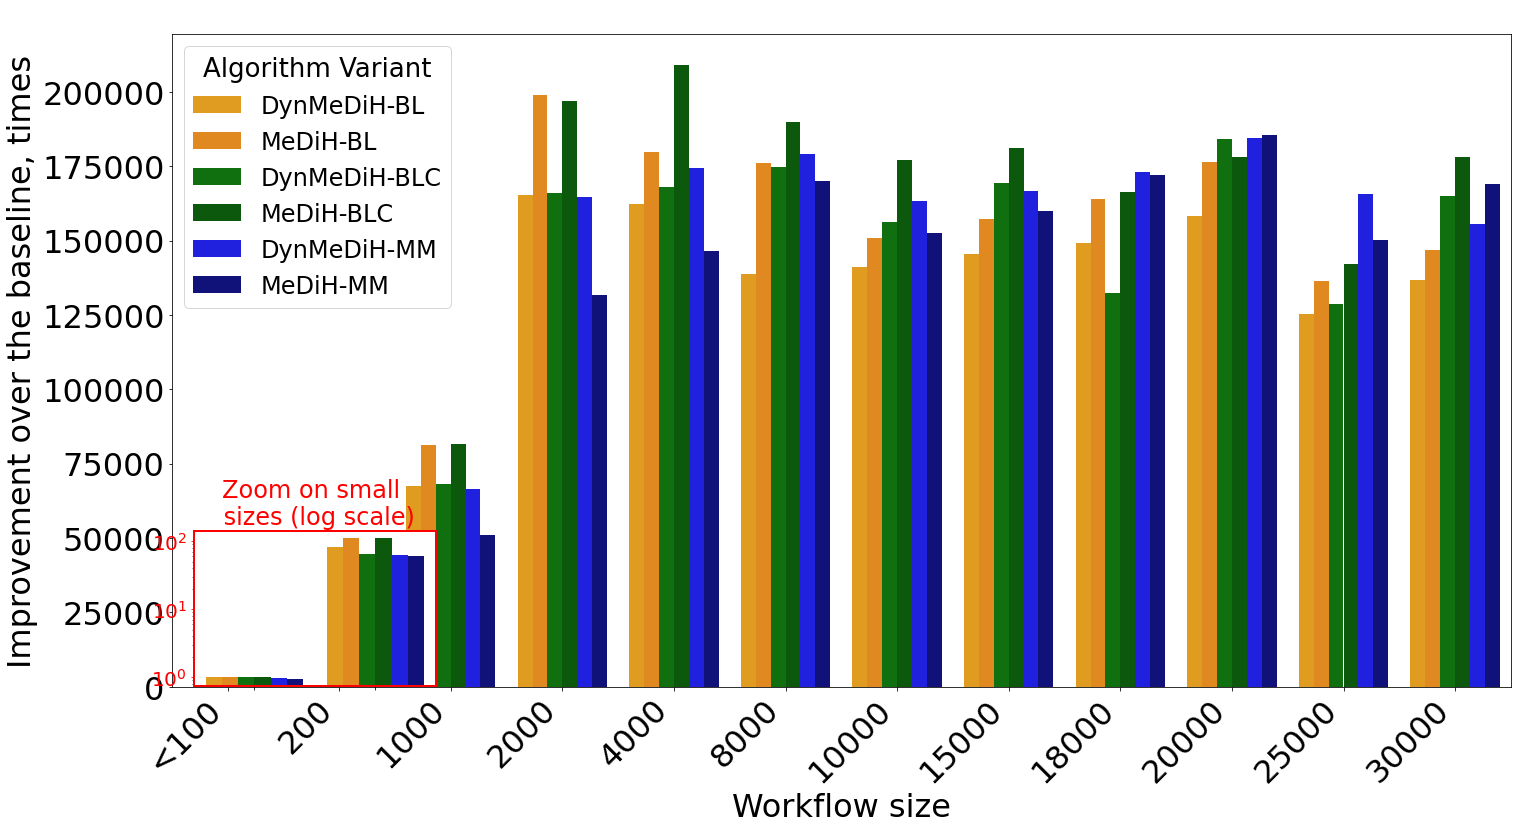

     size                   alg_rel          ratio
0     100    MeDiH-BL - dyn_vs_base       0.988958
1     100   MeDiH-BL - stat_vs_base       1.000000
2     100   MeDiH-BLC - dyn_vs_base       0.988958
3     100  MeDiH-BLC - stat_vs_base       1.006844
4     100    MeDiH-MM - dyn_vs_base       0.976487
..    ...                       ...            ...
67  30000   MeDiH-BL - stat_vs_base  146891.568735
68  30000   MeDiH-BLC - dyn_vs_base  164851.247267
69  30000  MeDiH-BLC - stat_vs_base  178209.501238
70  30000    MeDiH-MM - dyn_vs_base  155463.259021
71  30000   MeDiH-MM - stat_vs_base  169092.908127

[72 rows x 3 columns]
alg_rel
MeDiH-BL - dyn_vs_base      27287.199301
MeDiH-BL - stat_vs_base     31023.851094
MeDiH-BLC - dyn_vs_base     28508.447190
MeDiH-BLC - stat_vs_base    33130.011164
MeDiH-MM - dyn_vs_base      29714.453445
MeDiH-MM - stat_vs_base     27507.366634
Name: ratio, dtype: float64


In [5]:
path = "./param-study-pcsp/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-ndev~(pspw\+\d)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','pspw+2')], dfs[('A2','pspw+2')], dfs[('A3','pspw+2')], dfs[('BASE','pspw+2')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df,"", "", # "no deviations", "Makespan improvement over baseline,"
                       ['stat_vs_base', 'dyn_vs_base'])#
                      # ['internal'])
allInternals = plot_df[plot_df['relation']=='internal']

In [29]:
# Define the size categories
def size_category(size):
    if size <= 200:
        return 'small'
    elif 1000 <= size <= 8000:
        return 'middle'
    elif 10000 <= size <= 18000:
        return 'large'
    elif 20000 <= size <= 30000:
        return 'largest'
    else:
        return 'other'

allInternals = allInternals.copy()
allInternals = allInternals.dropna(subset=['ratio'])
#print(allInternals.to_string())
# Add a new column for size group
allInternals['size_group'] = allInternals['size'].apply(size_category)

# Filter only valid categories
filtered = allInternals[allInternals['size_group'] != 'other']

# Group by algorithm and size_group, then compute geometric mean
result = filtered.groupby(['algorithm', 'size_group'])['ratio'].agg(gmean).reset_index()

# Optionally, sort the result
size_order = ['small', 'middle', 'large', 'largest']
result['size_group'] = pd.Categorical(result['size_group'], categories=size_order, ordered=True)
result = result.sort_values(['algorithm', 'size_group'])

print(result)

by_algo = allInternals.groupby('algorithm')['ratio'].agg(gmean).reset_index()
print(by_algo)

    algorithm size_group     ratio
3    MeDiH-BL      small  1.246459
2    MeDiH-BL     middle  1.192914
0    MeDiH-BL      large  1.088830
1    MeDiH-BL    largest  1.093207
7   MeDiH-BLC      small  1.405027
6   MeDiH-BLC     middle  1.178036
4   MeDiH-BLC      large  1.153754
5   MeDiH-BLC    largest  1.048344
11   MeDiH-MM      small  0.957900
10   MeDiH-MM     middle  0.834725
8    MeDiH-MM      large  0.969451
9    MeDiH-MM    largest  0.999512
   algorithm     ratio
0   MeDiH-BL  1.147130
1  MeDiH-BLC  1.169346
2   MeDiH-MM  0.924310


./real-exps-correctparams/merged_final/*.txt


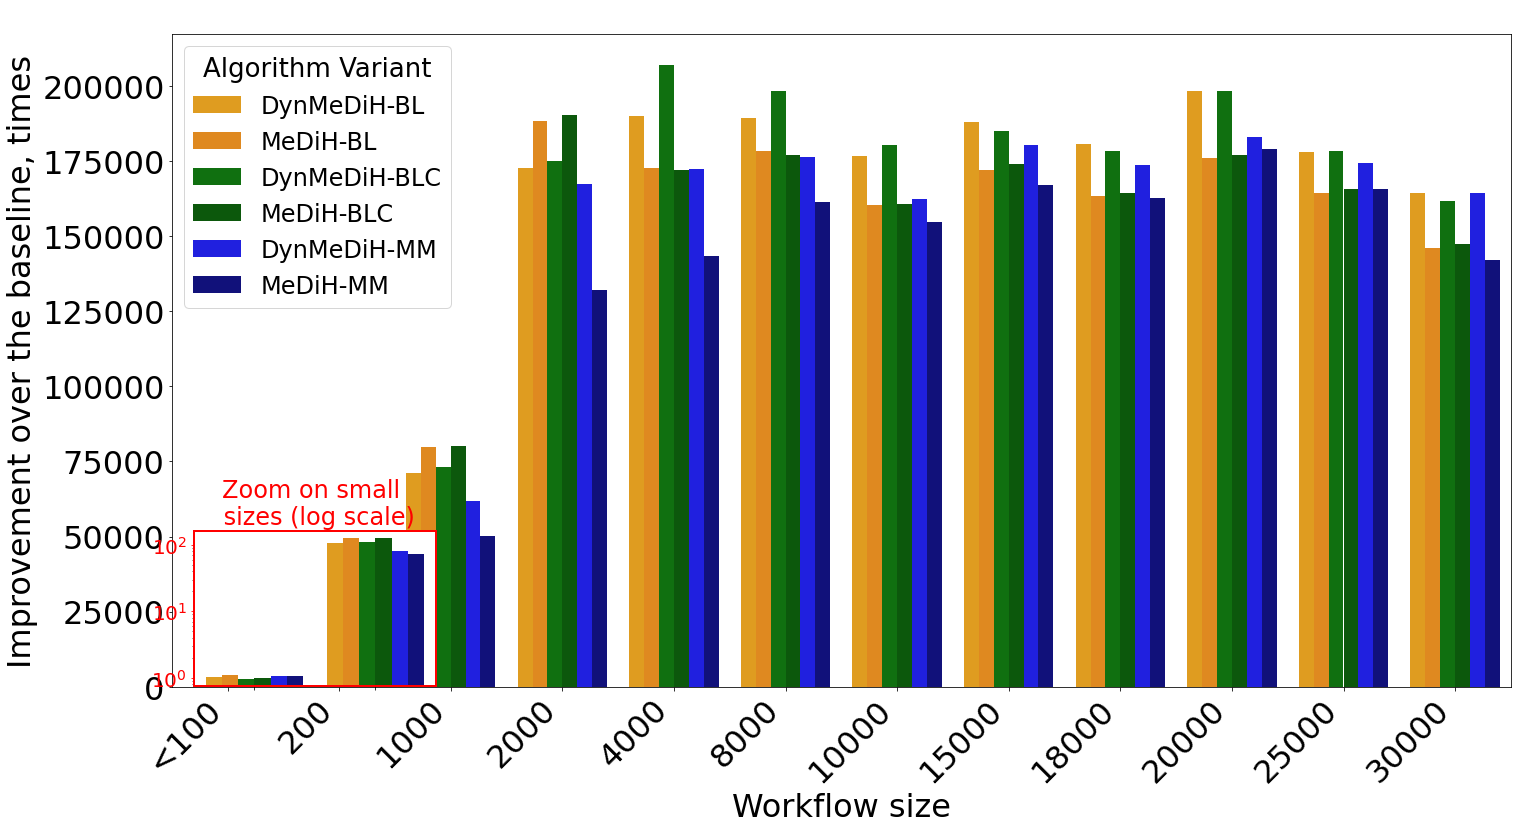

     size                   alg_rel          ratio
0     100    MeDiH-BL - dyn_vs_base       1.037528
1     100   MeDiH-BL - stat_vs_base       1.088441
2     100   MeDiH-BLC - dyn_vs_base       0.954776
3     100  MeDiH-BLC - stat_vs_base       1.001436
4     100    MeDiH-MM - dyn_vs_base       1.074793
..    ...                       ...            ...
67  30000   MeDiH-BL - stat_vs_base  146188.569150
68  30000   MeDiH-BLC - dyn_vs_base  161818.556683
69  30000  MeDiH-BLC - stat_vs_base  147425.829948
70  30000    MeDiH-MM - dyn_vs_base  164202.599649
71  30000   MeDiH-MM - stat_vs_base  142178.927059

[72 rows x 3 columns]
alg_rel
MeDiH-BL - dyn_vs_base      33021.869369
MeDiH-BL - stat_vs_base     32119.863900
MeDiH-BLC - dyn_vs_base     33303.463086
MeDiH-BLC - stat_vs_base    32069.199928
MeDiH-MM - dyn_vs_base      30743.025584
MeDiH-MM - stat_vs_base     27746.777615
Name: ratio, dtype: float64


In [7]:
#############'THIS IS CORRECT ''''''''''''''''''''''''
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
#print(dfsVar1)
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df, "", "", ['stat_vs_base', 'dyn_vs_base'])# "deviations 10%", "Makespan improvement over baseline, ",
allInternals = plot_df[plot_df['relation']=='internal']

In [31]:
# Define the size categories
def size_category(size):
    if size <= 200:
        return 'small'
    elif 1000 <= size <= 8000:
        return 'middle'
    elif 10000 <= size <= 18000:
        return 'large'
    elif 20000 <= size <= 30000:
        return 'largest'
    else:
        return 'other'

allInternals = allInternals.copy()
#print(allInternals.to_string())
# Add a new column for size group
allInternals['size_group'] = allInternals['size'].apply(size_category)

# Filter only valid categories
filtered = allInternals[allInternals['size_group'] != 'other']

# Group by algorithm and size_group, then compute geometric mean
result = filtered.groupby(['algorithm', 'size_group'])['ratio'].agg(gmean).reset_index()

# Optionally, sort the result
size_order = ['small', 'middle', 'large', 'largest']
result['size_group'] = pd.Categorical(result['size_group'], categories=size_order, ordered=True)
result = result.sort_values(['algorithm', 'size_group'])

print(result)

by_algo = allInternals.groupby('algorithm')['ratio'].agg(gmean).reset_index()
print(by_algo)

    algorithm size_group     ratio
3    MeDiH-BL      small  1.105198
2    MeDiH-BL     middle  1.013005
0    MeDiH-BL      large  0.908603
1    MeDiH-BL    largest  0.900253
7   MeDiH-BLC      small  1.097226
6   MeDiH-BLC     middle  0.971417
4   MeDiH-BLC      large  0.917158
5   MeDiH-BLC    largest  0.911325
11   MeDiH-MM      small  0.954134
10   MeDiH-MM     middle  0.836152
8    MeDiH-MM      large  0.938172
9    MeDiH-MM    largest  0.932181
   algorithm     ratio
0   MeDiH-BL  0.977168
1  MeDiH-BLC  0.967456
2   MeDiH-MM  0.905377


./real-exps-correctparams/merged_final/*.txt


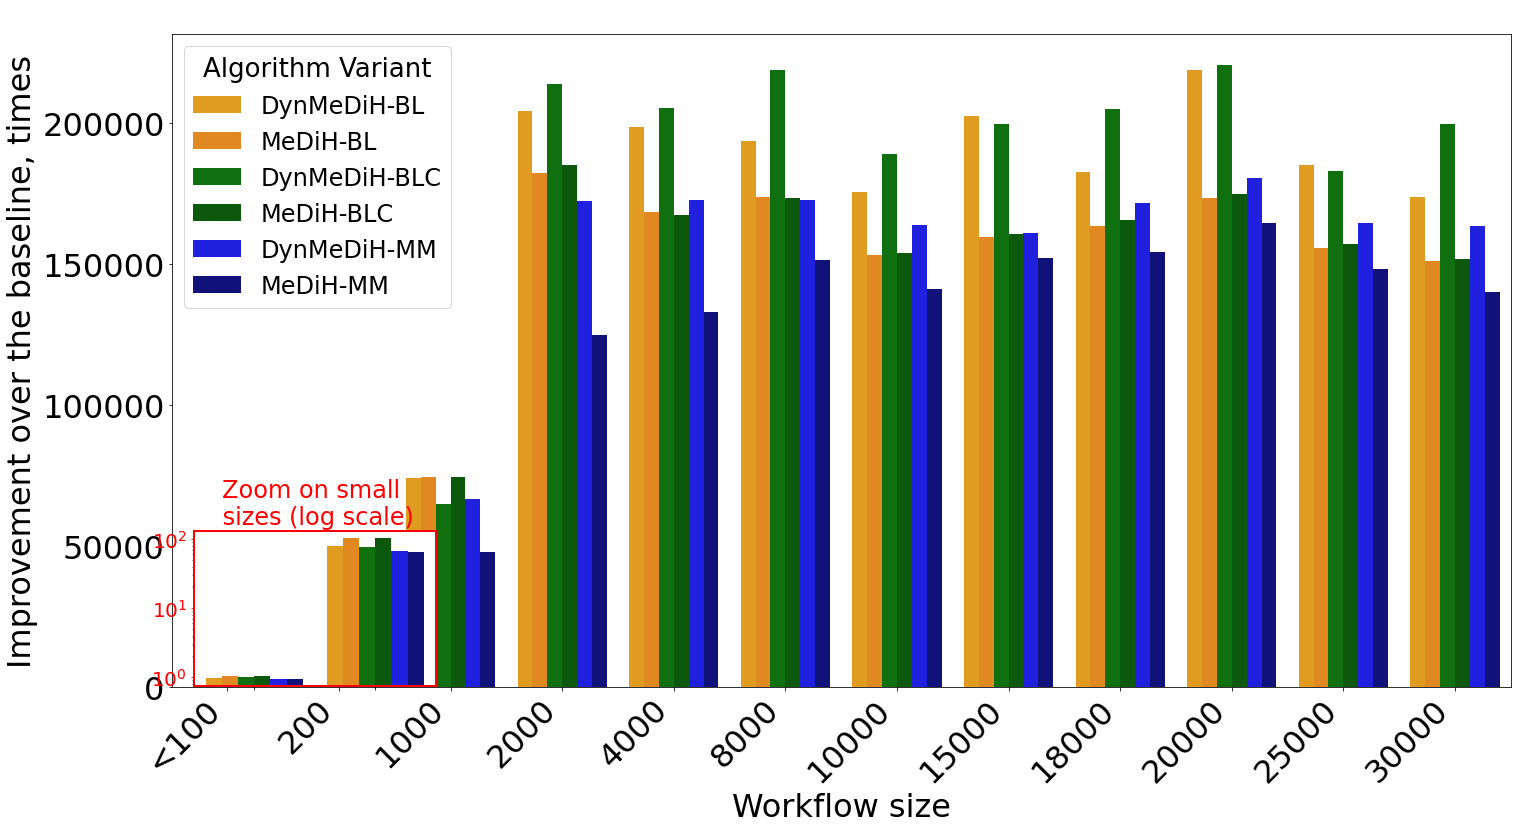

     size                   alg_rel          ratio
0     100    MeDiH-BL - dyn_vs_base       0.974259
1     100   MeDiH-BL - stat_vs_base       1.031636
2     100   MeDiH-BLC - dyn_vs_base       0.998511
3     100  MeDiH-BLC - stat_vs_base       1.044201
4     100    MeDiH-MM - dyn_vs_base       0.939415
..    ...                       ...            ...
67  30000   MeDiH-BL - stat_vs_base  151085.094718
68  30000   MeDiH-BLC - dyn_vs_base  199671.528789
69  30000  MeDiH-BLC - stat_vs_base  151829.020279
70  30000    MeDiH-MM - dyn_vs_base  163551.376701
71  30000   MeDiH-MM - stat_vs_base  139973.118095

[72 rows x 3 columns]
alg_rel
MeDiH-BL - dyn_vs_base      33624.270282
MeDiH-BL - stat_vs_base     30685.713068
MeDiH-BLC - dyn_vs_base     34629.275746
MeDiH-BLC - stat_vs_base    30852.784338
MeDiH-MM - dyn_vs_base      29691.410349
MeDiH-MM - stat_vs_base     25712.829937
Name: ratio, dtype: float64


In [8]:
#############'THIS IS CORRECT ''''''''''''''''''''''''
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','30dev')], dfs[('A2','30dev')], dfs[('A3','30dev')], dfs[('BASE','30dev')]]
#print(dfsVar1)
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df, "", "", ['stat_vs_base', 'dyn_vs_base'])#"for deviations of 30%", "Relative makespan improvement ",
allInternals = plot_df[plot_df['relation']=='internal']

In [86]:
# Define the size categories
def size_category(size):
    if size <= 200:
        return 'small'
    elif 1000 <= size <= 8000:
        return 'middle'
    elif 10000 <= size <= 18000:
        return 'large'
    elif 20000 <= size <= 30000:
        return 'largest'
    else:
        return 'other'

allInternals = allInternals.copy()
#print(allInternals.to_string())
# Add a new column for size group
allInternals['size_group'] = allInternals['size'].apply(size_category)

# Filter only valid categories
filtered = allInternals[allInternals['size_group'] != 'other']

# Group by algorithm and size_group, then compute geometric mean
result = filtered.groupby(['algorithm', 'size_group'])['ratio'].agg(gmean).reset_index()

# Optionally, sort the result
size_order = ['small', 'middle', 'large', 'largest']
result['size_group'] = pd.Categorical(result['size_group'], categories=size_order, ordered=True)
result = result.sort_values(['algorithm', 'size_group'])

print(result)

by_algo = allInternals.groupby('algorithm')['ratio'].agg(gmean).reset_index()
print(by_algo)

    algorithm size_group     ratio
3    MeDiH-BL      small  1.194239
2    MeDiH-BL     middle  0.908425
0    MeDiH-BL      large  0.849610
1    MeDiH-BL    largest  0.832975
7   MeDiH-BLC      small  1.216748
6   MeDiH-BLC     middle  0.895441
4   MeDiH-BLC      large  0.809096
5   MeDiH-BLC    largest  0.803900
11   MeDiH-MM      small  0.991663
10   MeDiH-MM     middle  0.769352
8    MeDiH-MM      large  0.902910
9    MeDiH-MM    largest  0.889525
   algorithm     ratio
0   MeDiH-BL  0.909648
1  MeDiH-BLC  0.888436
2   MeDiH-MM  0.862952


./real-exps-correctparams/merged_final/*.txt
./real-exps-correctparams/merged_final/BASE-50dev.txt
./real-exps-correctparams/merged_final/A1-50dev.txt
./real-exps-correctparams/merged_final/A2-50dev.txt
./real-exps-correctparams/merged_final/BASE-30dev.txt
./real-exps-correctparams/merged_final/A2-10dev.txt
./real-exps-correctparams/merged_final/A1-30dev.txt
./real-exps-correctparams/merged_final/A3-30dev.txt
./real-exps-correctparams/merged_final/BASE-10dev.txt
./real-exps-correctparams/merged_final/A2-30dev.txt
./real-exps-correctparams/merged_final/A3-50dev.txt
./real-exps-correctparams/merged_final/A3-10dev.txt
./real-exps-correctparams/merged_final/A1-10dev.txt
!!!      algo_nr              wf_name     inp_size  dur_alg1          ms_1  \
0          1    atacseq_30000.dot  14091675276  1.270169  1.603448e+09   
1          1    chipseq_15000.dot  41366257414  0.626734  2.711482e+09   
2          1  methylseq_15000.dot   6761426956  0.619555  9.600079e+07   
3          1    atacseq_1

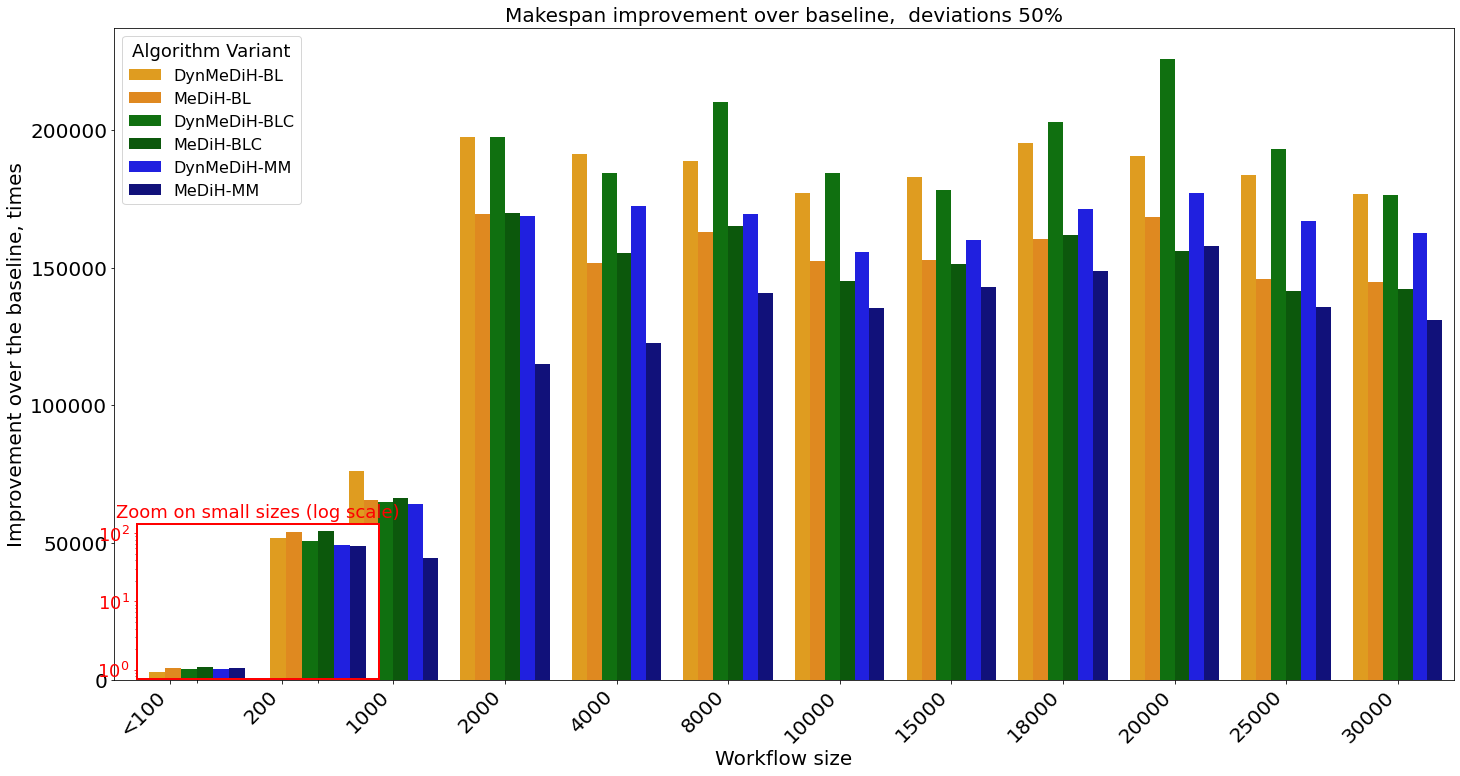

     size                   alg_rel          ratio
0     100    MeDiH-BL - dyn_vs_base       0.921802
1     100   MeDiH-BL - stat_vs_base       1.051601
2     100   MeDiH-BLC - dyn_vs_base       1.023895
3     100  MeDiH-BLC - stat_vs_base       1.088905
4     100    MeDiH-MM - dyn_vs_base       1.013222
..    ...                       ...            ...
67  30000   MeDiH-BL - stat_vs_base  144908.615615
68  30000   MeDiH-BLC - dyn_vs_base  176322.100084
69  30000  MeDiH-BLC - stat_vs_base  142446.418041
70  30000    MeDiH-MM - dyn_vs_base  162788.688743
71  30000   MeDiH-MM - stat_vs_base  131140.319193

[72 rows x 3 columns]
alg_rel
MeDiH-BL - dyn_vs_base      33016.981433
MeDiH-BL - stat_vs_base     29341.684323
MeDiH-BLC - dyn_vs_base     33472.192199
MeDiH-BLC - stat_vs_base    29174.264924
MeDiH-MM - dyn_vs_base      29527.849087
MeDiH-MM - stat_vs_base     24586.257710
Name: ratio, dtype: float64


In [91]:
#### wf gtßen rausnehmen oder verschmelzen
 # 18k und evtl 25 k
#############'THIS IS CORRECT ''''''''''''''''''''''''
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','50dev')], dfs[('A2','50dev')], dfs[('A3','50dev')], dfs[('BASE','50dev')]]
#print(dfsVar1)
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df, "deviations 50%", "Makespan improvement over baseline, ", ['stat_vs_base', 'dyn_vs_base'])#
#print(plot_df[plot_df['relation']=='internal'].to_string())
allInternals = plot_df[plot_df['relation']=='internal']

In [92]:
# Define the size categories
def size_category(size):
    if size <= 200:
        return 'small'
    elif 1000 <= size <= 8000:
        return 'middle'
    elif 10000 <= size <= 18000:
        return 'large'
    elif 20000 <= size <= 30000:
        return 'largest'
    else:
        return 'other'
def safe_gmean(x):
    x = np.array(x)
    x = x[x > 0]  # only positive values
    return gmean(x) if len(x) > 0 else np.nan    

allInternals = allInternals.copy()
print(allInternals)
# Add a new column for size group
allInternals['size_group'] = allInternals['size'].apply(size_category)

# Filter only valid categories
filtered = allInternals[allInternals['size_group'] != 'other']

# Group by algorithm and size_group, then compute geometric mean
result = filtered.groupby(['algorithm', 'size_group'])['ratio'].agg(safe_gmean).reset_index()

# Optionally, sort the result
size_order = ['small', 'middle', 'large', 'largest']
result['size_group'] = pd.Categorical(result['size_group'], categories=size_order, ordered=True)
result = result.sort_values(['algorithm', 'size_group'])

print(result)

by_algo = allInternals.groupby('algorithm')['ratio'].agg(safe_gmean).reset_index()
print(by_algo)

       size              wf_name     inp_size  relation     ratio algorithm
0     30000    atacseq_30000.dot  14091675276  internal  0.814058  MeDiH-BL
1     15000    chipseq_15000.dot  41366257414  internal  0.555916  MeDiH-BL
2     15000  methylseq_15000.dot   6761426956  internal  0.594389  MeDiH-BL
3     15000    atacseq_15000.dot   3908761308  internal  0.651701  MeDiH-BL
4       100                eager  19075314980  internal  2.388304  MeDiH-BL
...     ...                  ...          ...       ...       ...       ...
1892    100                eager  19132169434  internal  1.108192  MeDiH-MM
1893  10000  methylseq_10000.dot  17027257018  internal  1.176105  MeDiH-MM
1894    200        eager_200.dot   8330435694  internal  1.189068  MeDiH-MM
1895  18000  methylseq_18000.dot  22500260922  internal  1.050029  MeDiH-MM
1896  10000    chipseq_10000.dot   4807293396  internal  0.746527  MeDiH-MM

[813 rows x 6 columns]
    algorithm size_group     ratio
3    MeDiH-BL      small  1.1

./real-exps-correctparams/merged-test/*.csv
./real-exps-correctparams/merged-test/modified_A1_10dev.csv
./real-exps-correctparams/merged-test/modified_BASE_50dev.csv
./real-exps-correctparams/merged-test/modified_A1_50dev.csv
./real-exps-correctparams/merged-test/modified_A3_30dev.csv
./real-exps-correctparams/merged-test/modified_A1_30dev.csv
./real-exps-correctparams/merged-test/modified_A2_10dev.csv
./real-exps-correctparams/merged-test/modified_A3_10dev.csv
./real-exps-correctparams/merged-test/modified_A3_50dev.csv
./real-exps-correctparams/merged-test/modified_A2_50dev.csv
./real-exps-correctparams/merged-test/modified_BASE_10dev.csv
./real-exps-correctparams/merged-test/modified_A2_30dev.csv
./real-exps-correctparams/merged-test/modified_BASE_30dev.csv
!!!      Unnamed: 0  algo_nr              wf_name     inp_size  dur_alg1  \
0             0        1    atacseq_30000.dot  14091675276  1.270169   
1             1        1    chipseq_15000.dot  41366257414  0.626734   
2         

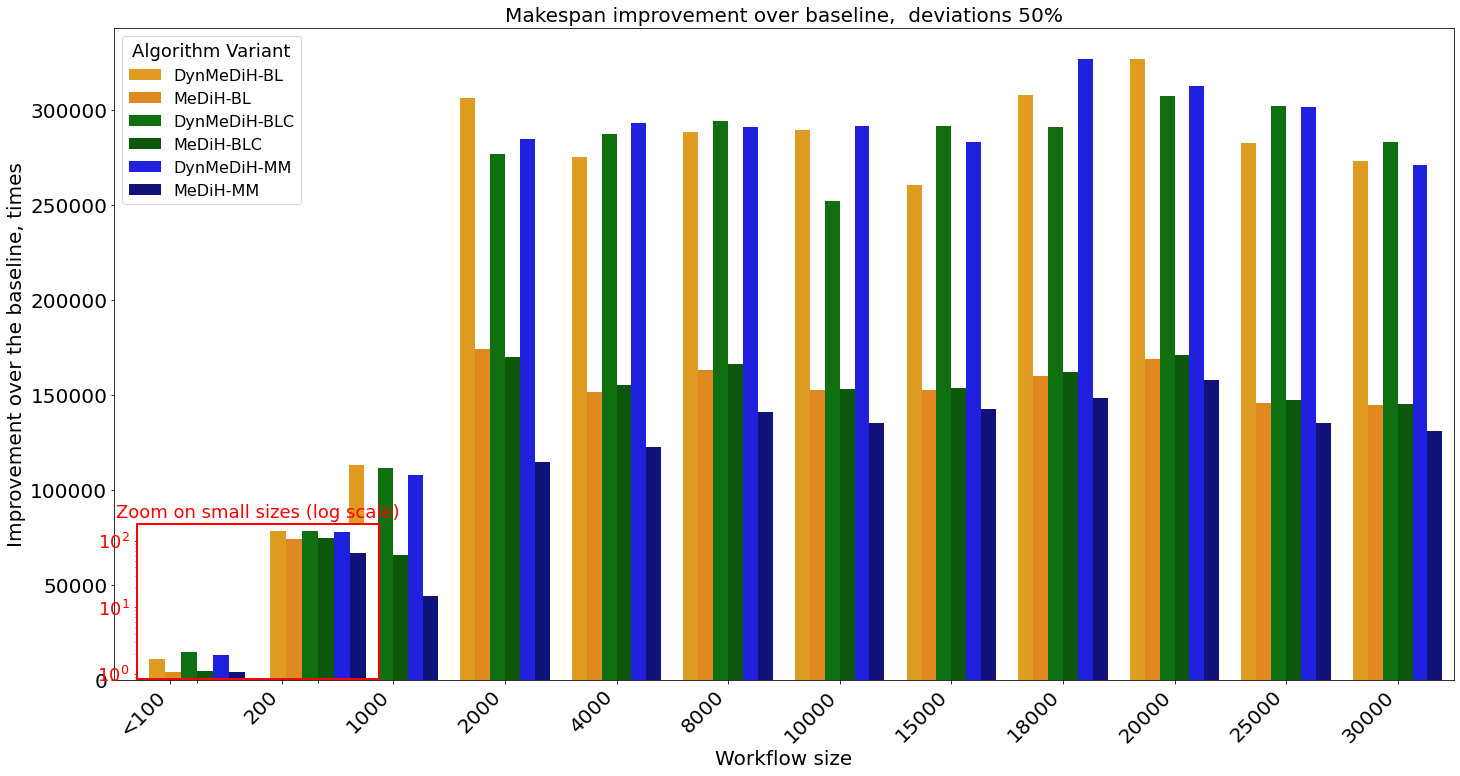

     size                   alg_rel          ratio
0     100    MeDiH-BL - dyn_vs_base       1.660424
1     100   MeDiH-BL - stat_vs_base       1.051601
2     100   MeDiH-BLC - dyn_vs_base       2.089416
3     100  MeDiH-BLC - stat_vs_base       1.088905
4     100    MeDiH-MM - dyn_vs_base       1.911727
..    ...                       ...            ...
67  30000   MeDiH-BL - stat_vs_base  144908.615615
68  30000   MeDiH-BLC - dyn_vs_base  283088.152120
69  30000  MeDiH-BLC - stat_vs_base  145205.884669
70  30000    MeDiH-MM - dyn_vs_base  271308.012512
71  30000   MeDiH-MM - stat_vs_base  131140.319193

[72 rows x 3 columns]
alg_rel
MeDiH-BL - dyn_vs_base      51831.111953
MeDiH-BL - stat_vs_base     29418.193534
MeDiH-BLC - dyn_vs_base     52455.935987
MeDiH-BLC - stat_vs_base    29735.470087
MeDiH-MM - dyn_vs_base      52824.158761
MeDiH-MM - stat_vs_base     24586.257710
Name: ratio, dtype: float64


In [25]:

path = "./real-exps-correctparams/merged-test/*.csv"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'


dfs = {}

for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname, delimiter=',', header=0, on_bad_lines="skip")
    basename = os.path.basename(fname)
    match = re.search(patterndevs, basename)

    if match:
        algorithm = match.group(1)
        variant = match.group(2)
        dfs[(algorithm, variant)] = df
    else:
        print("No match found. " + basename)
    

#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','50dev')], dfs[('A2','50dev')], dfs[('A3','50dev')], dfs[('BASE','50dev')]]
#print(dfsVar1)


def merge_correct_columns1(dfsOurVar, lbs):
    renamed_dfs = []
    for df, label in zip(dfsOurVar, lbs):
        # Rename selected columns
        print("!!!", df)
        renamed = df[['wf_name', 'inp_size', 'ms_1', 'ms_2']].copy()
        renamed = renamed.rename(columns={
            'ms_1': f'ms_1_{label}',
            'ms_2': f'ms_2_{label}',
        })    
        renamed_dfs.append(renamed)


    # Merge them all on 'wf_name'
   
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['wf_name', 'inp_size']), renamed_dfs)


    merged_df['size'] = merged_df['wf_name'].str.extract(r'_(\d+)\.')[0].fillna("100")
    merged_df['size'] = merged_df['size'].astype(int)


    for col in merged_df.columns:
        if col.startswith("ms_"):
            merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")
    
    return merged_df


merged_df_var1 = merge_correct_columns1(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df, "deviations 50%", "Makespan improvement over baseline, ", ['stat_vs_base', 'dyn_vs_base'])#
#print(plot_df[plot_df['relation']=='internal'].to_string())
allInternals = plot_df[plot_df['relation']=='internal']

In [28]:
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs2=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar2 = [dfs2[('A1','50dev')], dfs2[('A2','50dev')], dfs2[('A3','50dev')], dfs2[('BASE','50dev')]]
#print(dfsVar1)
merged_df_var2 = merge_correct_columns(dfsVar2, labels)
#print(merged_df_var1)
plot_df2 = buld_plot_df(merged_df_var2)

#print(plot_df.to_string())
#print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#print(plot_df2.to_string())

merged = plot_df.merge(
    plot_df2,
    on=['wf_name', 'inp_size', 'relation', 'algorithm'],
    suffixes=('_1', '_2')
)
merged_int = merged[merged["relation"]=="internal"]
print(merged_int.to_string())

./real-exps-correctparams/merged_final/*.txt
./real-exps-correctparams/merged_final/BASE-50dev.txt
./real-exps-correctparams/merged_final/A1-50dev.txt
./real-exps-correctparams/merged_final/A2-50dev.txt
./real-exps-correctparams/merged_final/BASE-30dev.txt
./real-exps-correctparams/merged_final/A2-10dev.txt
./real-exps-correctparams/merged_final/A1-30dev.txt
./real-exps-correctparams/merged_final/A3-30dev.txt
./real-exps-correctparams/merged_final/BASE-10dev.txt
./real-exps-correctparams/merged_final/A2-30dev.txt
./real-exps-correctparams/merged_final/A3-50dev.txt
./real-exps-correctparams/merged_final/A3-10dev.txt
./real-exps-correctparams/merged_final/A1-10dev.txt
!!!      algo_nr              wf_name     inp_size  dur_alg1          ms_1  \
0          1    atacseq_30000.dot  14091675276  1.270169  1.603448e+09   
1          1    chipseq_15000.dot  41366257414  0.626734  2.711482e+09   
2          1  methylseq_15000.dot   6761426956  0.619555  9.600079e+07   
3          1    atacseq_1